In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


df = pd.read_csv('dfmodel.csv')
df = df[['ds', 'y']]
df.sort_values(by='ds', inplace=True)
print(df.head())



            ds    y
0      2020-12  0.0
934    2020-12  0.0
7084   2020-12  0.0
7083   2020-12  0.0
16645  2020-12  0.0


<Axes: xlabel='ds'>

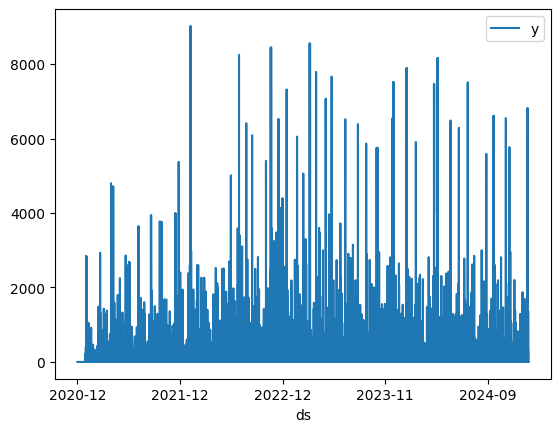

In [ ]:

# df.set_index('ds').plot()


   CODIGO_MED       ds  PRECIO  TOTAL_CONSUMO  STOCK_FIN MEDTIP MEDPET  \
0          91  2020-12    0.03            0.0        260      M      P   
1          91  2021-01    0.03          214.0         46      M      P   
2          91  2021-02    0.03           46.0        800      M      P   
3          91  2021-03    0.03           10.0        790      M      P   
4          91  2021-04    0.03           80.0        710      M      P   

    MEDFF MEDEST  
0  TABLET      _  
1  TABLET      _  
2  TABLET      _  
3  TABLET      _  
4  TABLET      _  


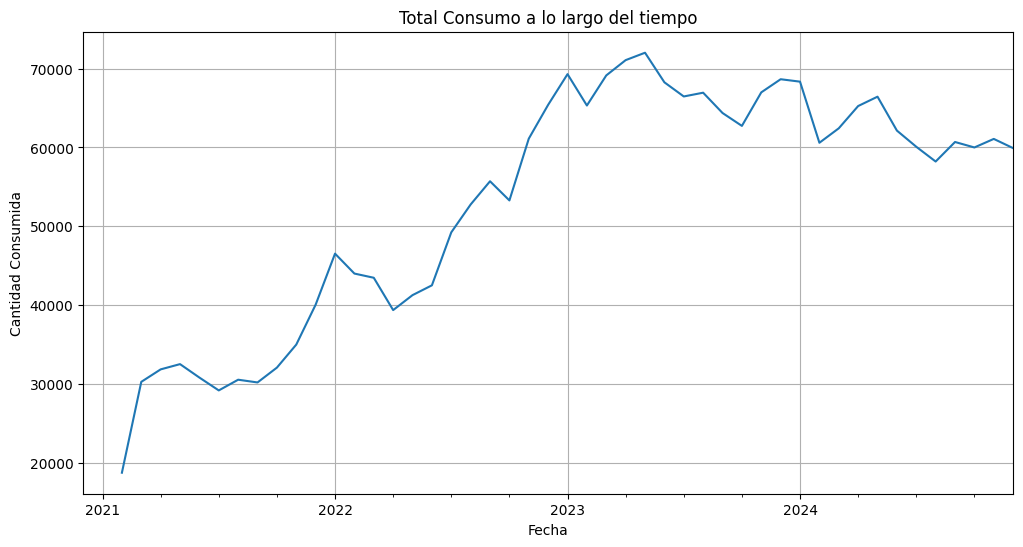

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2020-12-31 to 2024-12-31
Freq: ME
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODIGO_MED     49 non-null     int64  
 1   PRECIO         49 non-null     float64
 2   TOTAL_CONSUMO  47 non-null     float64
 3   STOCK_FIN      49 non-null     int64  
 4   MEDTIP         49 non-null     object 
 5   MEDPET         49 non-null     object 
 6   MEDFF          49 non-null     object 
 7   MEDEST         49 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB
None


In [7]:
df2 = pd.read_csv('df.csv')

print(df2.head())

df = df2.sort_values(by='ds')
df.set_index('ds', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.resample('ME').sum()
df['TOTAL_CONSUMO'] = df['TOTAL_CONSUMO'].rolling(window=3).mean()
df['TOTAL_CONSUMO'].plot(figsize=(12, 6))
plt.title('Total Consumo a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Consumida')
plt.grid(True)
plt.show()
print(df.info())




global stadictics = MAE: 55.32943994067847, RMSE: 24581.323304615285, MAPE: 2.697313345031141


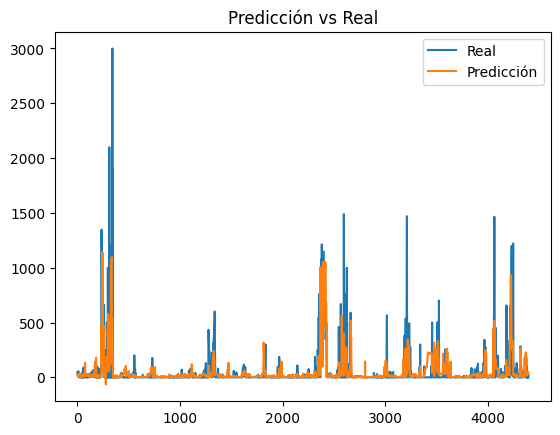

In [29]:
from pathlib import Path
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

df = pd.read_csv('df.csv')
# print(df.head())

# categorical = ['MEDTIP', 'MEDPET', 'MEDFF', 'MEDEST'] NINGUNA tiene buena corr asi que no voy a usar ninguna categoria
x = df[['STOCK_FIN', 'ds', 'CODIGO_MED', 'PRECIO']].copy()
x['ds'] = pd.to_datetime(x['ds'])
x['month'] = x['ds'].dt.month
x['year'] = x['ds'].dt.year
x.drop('ds', axis=1, inplace=True)
x['CODIGO_MED'] = x['CODIGO_MED'].astype('category')
x = pd.get_dummies(x, columns=['CODIGO_MED'], prefix='MED')
# print(x.head())

# idx = x['MED_91'] == True
# print(idx)

y = df['TOTAL_CONSUMO'].copy()
total_records = df['CODIGO_MED'].nunique()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=False)


model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
y_test_nonzero = y_test[y_test != 0]
y_pred_nonzero = y_pred[y_test != 0]
mape =  mean_absolute_percentage_error(y_test_nonzero, y_pred_nonzero)
print(f"global stadictics = MAE: {mae}, RMSE: {rmse}, MAPE: {mape}")


plt.plot(y_test.values, label="Real")
plt.plot(y_pred, label="Predicción")
plt.legend()
plt.title("Predicción vs Real")
plt.show()

# codigo = 23438  
# columna = f"MED_{codigo}"
# pastillas_presentes = [col for col in X_test.columns if col.startswith("MED_") and X_test[col].any()]
# print(pastillas_presentes)

# if columna in X_test.columns and X_test[columna].any():
#     idx = X_test[columna] == True
#     y_test_p = y_test[idx]
#     y_pred_p = model.predict(X_test[idx])

#     mae = mean_absolute_error(y_test_p, y_pred_p)
#     rmse = np.sqrt(mean_squared_error(y_test_p, y_pred_p))
#     mape = mean_absolute_percentage_error(y_test_p[y_test_p != 0], y_pred_p[y_test_p != 0])

#     plt.plot(y_test_p.values, label="Real")
#     plt.plot(y_pred_p, label="Predicción")
#     plt.legend()
#     plt.title(f"Predicción vs Real para {columna}")
#     plt.show()

#     print(f"{columna} → MAE: {mae}, RMSE: {rmse}, MAPE: {mape}")
# else:
#     print(f"No hay datos de {columna} en el set de prueba")

